In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
# x 的二次函数
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [19]:
# 可以看到它为我们加入了 x^0 和 x^2
X2[:5, :]

array([[ 1.        , -1.84302958,  3.39675804],
       [ 1.        ,  1.19949648,  1.4387918 ],
       [ 1.        , -0.40272788,  0.16218974],
       [ 1.        ,  2.52024847,  6.35165233],
       [ 1.        , -0.16416511,  0.02695018]])

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

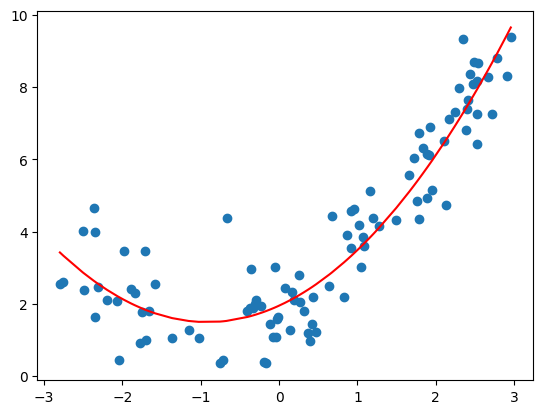

In [21]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [22]:
print(lin_reg2.coef_, lin_reg2.intercept_)

[0.         0.99492424 0.54415337] 1.9501876058959677


In [23]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [24]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [31]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 这样传入进去的数据，就会依次调用函数，并传递下去
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [33]:
# 调用方式一致
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

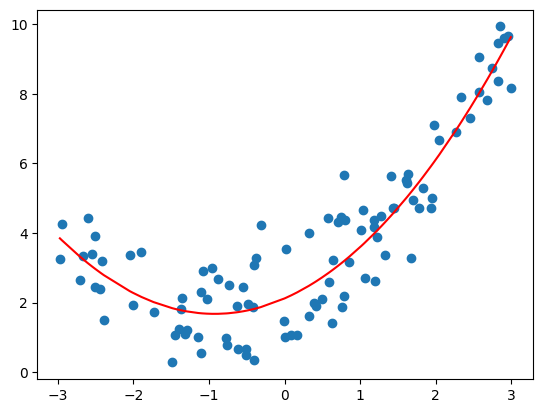

In [37]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()